<a href="https://colab.research.google.com/github/tomishing/python_data_science_basics/blob/main/cluster_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cluster Analysis

K-Means Clustering, Hierarchical clustering, and Agglometative clustering (a type of hierarchical) are major methods in ML.

## K-Means Clustering

**Description:**

Partitions data into K clusters by minimizing intra-cluster variance.

✅ Pros:
- Simple and fast.
- Scales well to large datasets.
- Easy to interpret.

❌ Cons:
- Must specify the number of clusters (K) in advance.
- Assumes spherical clusters (not suitable for complex shapes).
- Sensitive to outliers and initial centroids.

## Hierarchical Clustering

**Description:**

Builds a hierarchy of clusters using a bottom-up (agglomerative) or top-down (divisive) approach.

✅ Pros:
- No need to predefine number of clusters.
- Dendrogram offers detailed hierarchy and interpretability.
- Can capture nested clusters.

❌ Cons:
- Computationally expensive (not suitable for large datasets).
- Once merged/split, clusters cannot be undone.
- Sensitive to noise and outliers.

### Agglomerative Clustering (a type of hierarchical clustering)


✅  Pros:
- No need to predefine number of clusters.
- Good for small datasets and when cluster hierarchy is needed.

❌ Cons:
- Time complexity is high for large datasets.
- Doesn’t scale well.

## K-Means code

### Import libraries and data

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Import data
df = pd.read_csv("dataset.csv")
df.head(3)


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Target
0,3.457748,0.333664,-2.566723,-0.146569,-0.125433,-0.195521,-2.656916,-1.690528,-1.293285,0.352882,...,0.776569,-0.545546,-1.342666,1.341565,1.839825,-2.683013,-0.178316,-0.257991,-1.270606,0
1,-1.933777,-4.235040,-2.397564,6.013500,-0.662304,4.257843,5.069335,2.664667,1.555529,0.117215,...,0.393764,-0.246636,-0.218728,1.768924,1.505538,3.105431,-0.518480,-1.202098,-0.464592,2
2,1.034305,-0.226278,-0.118217,3.901001,2.410756,1.427277,-2.443985,-0.374603,-0.133994,-0.880938,...,-0.034812,2.349974,-0.762277,0.207691,1.511438,-1.569813,-0.072042,-2.120815,0.328832,2


### K-Means

`random_state=42`

This sets the random seed for reproducibility.
- K-Means uses random initialization (it randomly selects initial centroids).
- Setting random_state ensures that the results are consistent every time you run the code.
- 42 is just a common arbitrary number used for this purpose—you can use any integer.


In [ ]:
# Choose 'k' (number of clusters).
# Randomly select initial centroids.
# Assign points to the nearest centroid.
# Recalculate centroids based on assigned points.
# Repeat until centroids stabilize.

X = df.iloc[:, 0:2]
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster']=kmeans.fit_predict(X)


#### Plotting
##### matplotlib

In [ ]:
df['Feature_1'].head(2)

,Feature_1
0,3.457748
1,-1.933777


In [ ]:
df.columns[0]

'Feature_1'

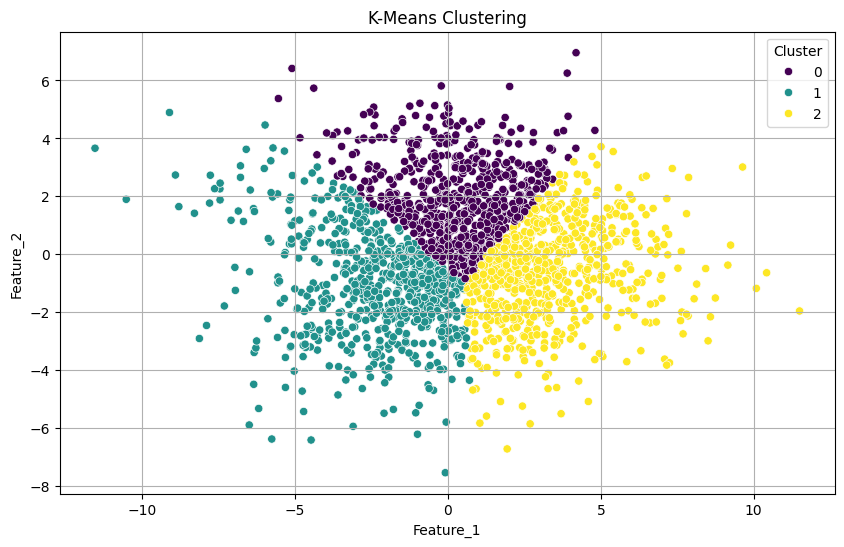

In [ ]:
plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df, x=df.columns[0], y=df.columns[1], hue='Cluster', palette='viridis')
sns.scatterplot(data=df, x=df['Feature_1'], y=df['Feature_2'], hue='Cluster', palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.grid(True)
plt.show()

##### plotly: 3D plot

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x=df.columns[0], y=df.columns[1], z=df.columns[2], color='Cluster',
                    title='3D interactive', labels={'0': df.columns[0], '1': df.columns[1], '2': df.columns[2]})
fig.show()


## Hierarchical clustering code

- `scaler = StandardScaler()`

  - This creates a StandardScaler object from sklearn.preprocessing.
  - It doesn’t do anything yet—just prepares the tool to calculate and apply standardization.

- `X_scaled = scaler.fit_transform(X)`

  - This does two things:
    - fit(X) computes the mean and standard deviation of each feature (column) in X.
    - transform(X) applies the transformation using this formula:
    
    $$
    X_{scaled} = \frac{X-\mu}{\sigma}
    $$


It standardizes the dataset X using z-score normalization, which is an important preprocessing step for many machine learning algorithms—including K-Means, PCA, and logistic regression.

The result is that each feature will have:
- mean = 0
- standard deviation = 1

- `Z = linkage(X_scaled, method='ward')`

  - linkage() builds a hierarchical cluster tree (dendrogram).
  - X_scaled is your standardized data (important so distances are meaningful).
  - method='ward' means it uses Ward’s method, which minimizes the variance within each cluster as it merges them.
  - The output Z is a linkage matrix, which stores the hierarchical clustering steps. Each row represents a merge:
[cluster1, cluster2, distance, sample_count].

- `cluster_labels = fcluster(Z, 3, criterion='maxclust')`

 - fcluster() "cuts" the dendrogram to form flat clusters.
 - 3 means you're requesting 3 clusters.
 - criterion='maxclust' tells it to stop cutting when it finds exactly 3 clusters.
 - The output cluster_labels is a 1D array that assigns a cluster ID (like 1, 2, 3) to each sample in your data.

 -`df['HCluster'] = cluster_labels.astype(str)`

  - It adds a new column named 'HCluster' to your DataFrame df.
  - This column contains the cluster assignment for each row, converted to string type (maybe for plotting or labeling purposes).


In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, :3].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Z = linkage(X_scaled, method='ward')

cluster_labels = fcluster(Z, 3, criterion='maxclust')
df['HCluster'] = cluster_labels.astype(str)

# 3D scatter plot
fig = px.scatter_3d(
    df,
    x=df.columns[0],
    y=df.columns[1],
    z=df.columns[2],
    color='HCluster',
    title='3D Interactive Hierarchical Clustering Visualization',
    labels={
        df.columns[0]: df.columns[0],
        df.columns[1]: df.columns[1],
        df.columns[2]: df.columns[2]
    },
    symbol='HCluster',
    width=900,
    height=600
)
fig.show()

In [ ]:
df.head(3)

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Target,Cluster,HCluster
0,3.457748,0.333664,-2.566723,-0.146569,-0.125433,-0.195521,-2.656916,-1.690528,-1.293285,0.352882,...,-1.342666,1.341565,1.839825,-2.683013,-0.178316,-0.257991,-1.270606,0,2,3
1,-1.933777,-4.235040,-2.397564,6.013500,-0.662304,4.257843,5.069335,2.664667,1.555529,0.117215,...,-0.218728,1.768924,1.505538,3.105431,-0.518480,-1.202098,-0.464592,2,1,1
2,1.034305,-0.226278,-0.118217,3.901001,2.410756,1.427277,-2.443985,-0.374603,-0.133994,-0.880938,...,-0.762277,0.207691,1.511438,-1.569813,-0.072042,-2.120815,0.328832,2,0,3


### Creating cluster profile

- `numeric_columns = df.select_dtypes(include=['number']).columns.tolist()`

  - Selects all numeric columns in the DataFrame df (e.g., int, float).
  - Converts them to a list of column names and stores it in numeric_columns.

- `if 'Cluster' in numeric_columns:`
    `numeric_columns.remove('Cluster')`
  - If a column named 'Cluster' is in the list of numeric columns, remove it.
  - Why? Because 'Cluster' is used as the grouping key in the next step, and we don’t want to calculate the mean of the cluster ID.

- `cluster_profile = df.groupby('Cluster')[numeric_columns].mean().reset_index()`

  - Groups the DataFrame by the 'Cluster' column (cluster ID).
  - For each cluster, it calculates the mean of all other numeric columns.
  - reset_index() flattens the resulting DataFrame so 'Cluster' becomes a regular column again (not an index).

In [ ]:
# Just making a list of culumns' labels
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
numeric_columns

['Feature_1',
 'Feature_2',
 'Feature_3',
 'Feature_4',
 'Feature_5',
 'Feature_6',
 'Feature_7',
 'Feature_8',
 'Feature_9',
 'Feature_10',
 'Feature_11',
 'Feature_12',
 'Feature_13',
 'Feature_14',
 'Feature_15',
 'Feature_16',
 'Feature_17',
 'Feature_18',
 'Feature_19',
 'Feature_20',
 'Target',
 'Cluster']

In [ ]:
# just remove `Cluster` from the list
if 'Cluster' in numeric_columns:
    numeric_columns.remove('Cluster')
numeric_columns

['Feature_1',
 'Feature_2',
 'Feature_3',
 'Feature_4',
 'Feature_5',
 'Feature_6',
 'Feature_7',
 'Feature_8',
 'Feature_9',
 'Feature_10',
 'Feature_11',
 'Feature_12',
 'Feature_13',
 'Feature_14',
 'Feature_15',
 'Feature_16',
 'Feature_17',
 'Feature_18',
 'Feature_19',
 'Feature_20',
 'Target']

In [ ]:
# 'Cluster' to row names for grouping by 'Cluster' values
cluster_profile_0 = df.groupby('Cluster')[numeric_columns].mean()
print(cluster_profile_0)

# 'Cluster' to a regular column
cluster_profile = cluster_profile_0.reset_index()
print(cluster_profile)

         Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
Cluster                                                                     
0         0.300921   1.931537  -1.089732  -2.496049  -0.514659   0.188503   
1        -2.387591  -1.097078   0.210747   2.175473  -0.207776   1.455095   
2         3.385565  -0.661282  -0.491391   0.074056  -0.285135  -0.907429   

         Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_12  \
Cluster                                               ...               
0        -1.232301  -0.629830  -0.133386    0.000163  ...   -0.574819   
1         2.731484   1.238154  -0.399348    0.069592  ...   -1.541969   
2        -0.570036  -0.584054   0.478182   -0.049162  ...   -0.095632   

         Feature_13  Feature_14  Feature_15  Feature_16  Feature_17  \
Cluster                                                               
0          0.038633   -0.019147    0.033325   -0.129887   -0.492927   
1         -0.078713    0.056423    

In [ ]:
# Visualize the cluster profiles using a parallel coordinates plot
fig = px.parallel_coordinates(
    cluster_profile,
    color='Cluster',
    labels={col: col for col in cluster_profile.columns},
    title='Cluster Profiling: Mean Feature Values per Cluster',
    color_continuous_scale=px.colors.qualitative.Set2
)
fig.show()

In [ ]:
# Choose a subset of features for visualization (e.g., first five)
subset_features = ['Cluster'] + numeric_columns[:5]
print('subset (only columns name): ', subset_features)

cluster_profile_subset = cluster_profile[subset_features]
print('\n subset by columns name: \n', cluster_profile_subset)


subset (only columns name):  ['Cluster', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5']

 subset by columns name: 
    Cluster  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0        0   0.300921   1.931537  -1.089732  -2.496049  -0.514659
1        1  -2.387591  -1.097078   0.210747   2.175473  -0.207776
2        2   3.385565  -0.661282  -0.491391   0.074056  -0.285135


In [ ]:
# Plot with Plotly (parallel coordinates for subset)
fig = px.parallel_coordinates(
    cluster_profile_subset,
    color='Cluster',
    labels={col: col for col in cluster_profile_subset.columns},
    title='Cluster Profiling (First Five Numeric Features)',
    color_continuous_scale=px.colors.qualitative.Set2
)
fig.show()

#### Pivot table

- `values='Feature_1'`: The numeric column whose values you want to summarize.

- `index='Cluster'`: Rows will be grouped by unique values in the 'Cluster' column.

- `columns='Target'`: Columns will be created for each unique value in the 'Target' column.

- `aggfunc='mean'`: It calculates the mean of 'Feature_1' for each combination of 'Cluster' and 'Target'.

##### Interpretation

- Target: features, like Yes or No, height, weight, etc
- then compare each cluster with those mean

In [ ]:
# Create a pivot table summarizing Feature_1 averages by Cluster and Target
pivot_table = pd.pivot_table(df, values='Feature_1', index='Cluster', columns='Target', aggfunc='mean')
print(pivot_table)

Target          0         1         2
Cluster                              
0        0.297296  0.108852  0.706073
1       -1.643038 -3.580771 -2.130806
2        3.269239  4.132248  2.621078
